In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import torch

## Carga del dataset TUSimple

In [2]:
from datasets.tusimple import TUSimpleDataset

test_dataset = TUSimpleDataset(train=False)

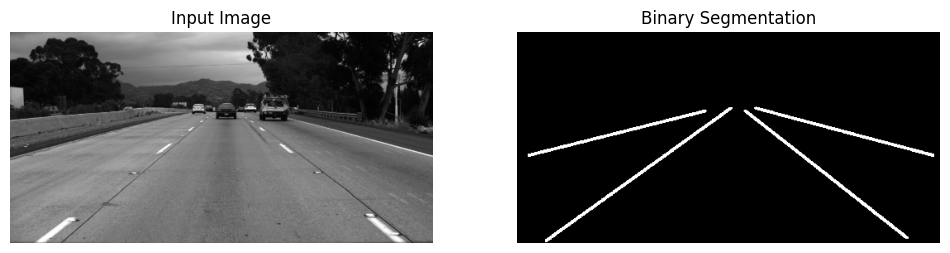

In [3]:
image, segmentation_image, instance_image = test_dataset[0]

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmentation_image.squeeze(), cmap="gray")
plt.title("Binary Segmentation")
plt.axis("off")

plt.show()

## Carga del modelo ENet entrenado

El modelo ENet, que significa "Efficient Neural Network", es una arquitectura de red neuronal diseñada para tareas de segmentación semántica en imágenes. ENet es como un "entendido de imágenes" que puede identificar y entender diferentes partes de una imagen.

In [4]:
from models.enet import ENet

enet_model = ENet(binary_seg=2, embedding_dim=4)

save_dict = torch.load(os.path.join("saved_models", "enet_model.pth"), map_location="cpu")
enet_model.load_state_dict(save_dict)

<All keys matched successfully>

## Prueba del modelo ENet

Con una imagen de test del dataset

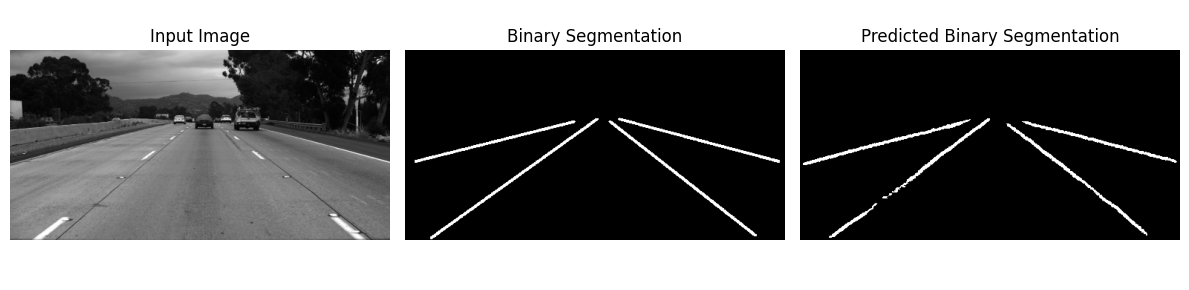

In [5]:
binary_seg, instance_seg = enet_model.predict(image)

plt.figure(figsize=(12, 3))
plt.axis("off")

plt.subplot(1, 3, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(segmentation_image.squeeze(), cmap="gray")
plt.title("Binary Segmentation")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(binary_seg, cmap="gray")
plt.title("Predicted Binary Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()

Con una imagen que no es del dataset

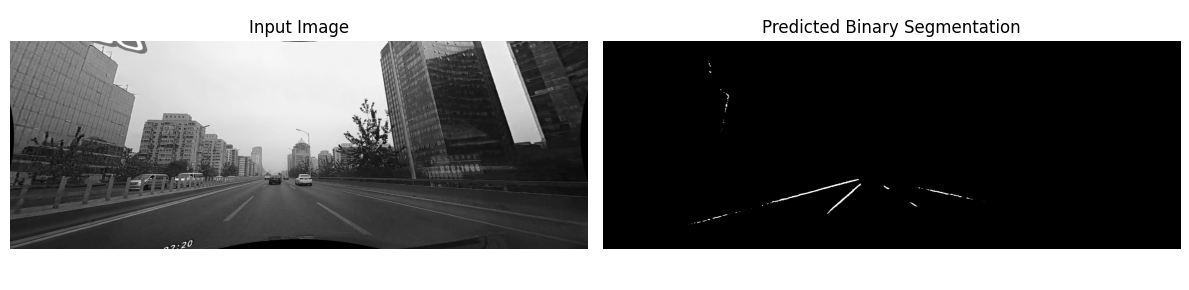

In [6]:
img_test = cv2.imread("img_test.jpg")
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
img_test = img_test[..., None]
img_test = torch.from_numpy(img_test).float().permute((2, 0, 1))

binary_seg, instance_seg = enet_model.predict(img_test)

plt.figure(figsize=(12, 3))
plt.axis("off")

plt.subplot(1, 2, 1)
plt.imshow(img_test.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(binary_seg, cmap="gray")
plt.title("Predicted Binary Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()

## Carga del modelo SCNN entrenado

El modelo SCNN, que significa "Spatial CNN" (Red Neuronal Convolucional Espacial), es una arquitectura diseñada específicamente para la tarea de detección de carriles en imágenes de escenas de tráfico.

In [7]:
from models.scnn import SCNN

scnn_model = SCNN((128, 64))

save_dict = torch.load(os.path.join("saved_models", "scnn_model.pth"), map_location="cpu")
scnn_model.load_state_dict(save_dict)

d:\Users\CARLOS\Documents\Tareas y Trabajos UBB\Introducción a las aplicaciones de algoritmos de ML y DL\Proyecto Semestral\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Users\CARLOS\Documents\Tareas y Trabajos UBB\Introducción a las aplicaciones de algoritmos de ML y DL\Proyecto Semestral\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

## Prueba del modelo SCNN

Con una imagen de test del dataset

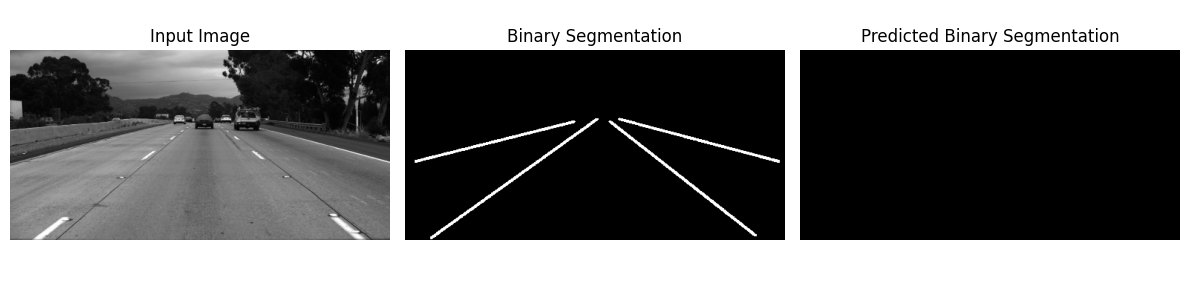

In [8]:
binary_seg = scnn_model.predict(image)

plt.figure(figsize=(12, 3))
plt.axis("off")

plt.subplot(1, 3, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(segmentation_image.squeeze(), cmap="gray")
plt.title("Binary Segmentation")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(binary_seg, cmap="gray")
plt.title("Predicted Binary Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()

Con una imagen que no es del dataset

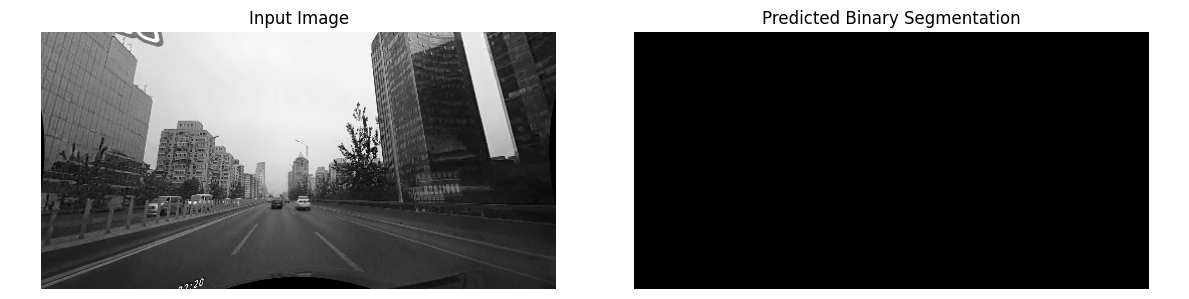

In [9]:
img_test = cv2.imread("img_test.jpg")
img_test = cv2.resize(img_test, (512, 256), interpolation=cv2.INTER_LINEAR)
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
img_test = img_test[..., None]
img_test = torch.from_numpy(img_test).float().permute((2, 0, 1))

binary_seg = scnn_model.predict(img_test)

plt.figure(figsize=(12, 3))
plt.axis("off")

plt.subplot(1, 2, 1)
plt.imshow(img_test.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(binary_seg, cmap="gray")
plt.title("Predicted Binary Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()

## Carga del modelo LaneNet entrenado

El modleo LaneNet es una red neuronal diseñada específicamente para la detección y segmentación detallada de carriles en imágenes de carreteras.

In [10]:
from models.lanenet import LaneNet

lanenet_model = LaneNet()

save_dict = torch.load(os.path.join("saved_models", "lanenet_model.pth"), map_location="cpu")
lanenet_model.load_state_dict(save_dict)

d:\Users\CARLOS\Documents\Tareas y Trabajos UBB\Introducción a las aplicaciones de algoritmos de ML y DL\Proyecto Semestral\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

## Prueba del modelo LaneNet

Con una imagen de test del dataset

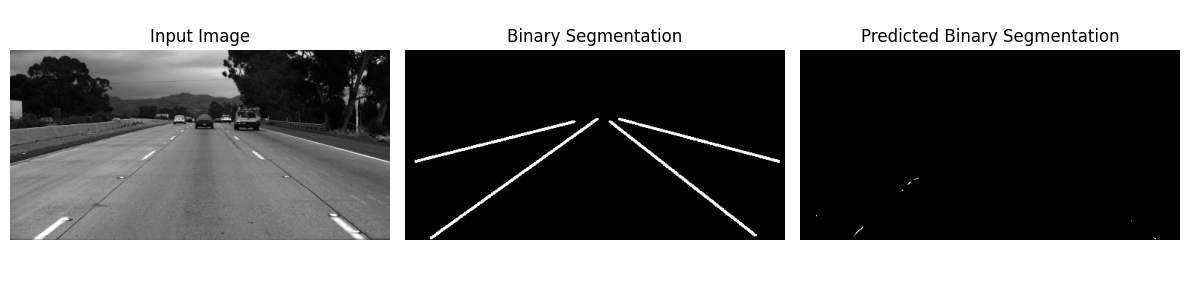

In [11]:
binary_seg, _ = lanenet_model.predict(image)

plt.figure(figsize=(12, 3))
plt.axis("off")

plt.subplot(1, 3, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(segmentation_image.squeeze(), cmap="gray")
plt.title("Binary Segmentation")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(binary_seg, cmap="gray")
plt.title("Predicted Binary Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()

Con una imagen que no es del dataset

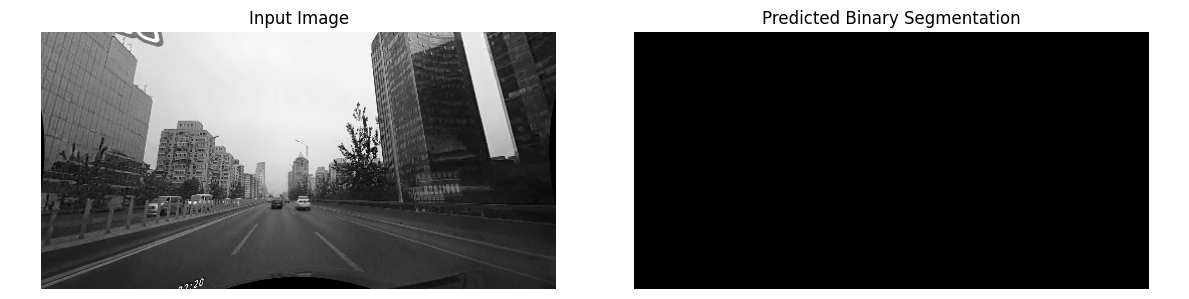

In [12]:
binary_seg = scnn_model.predict(img_test)

plt.figure(figsize=(12, 3))
plt.axis("off")

plt.subplot(1, 2, 1)
plt.imshow(img_test.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(binary_seg, cmap="gray")
plt.title("Predicted Binary Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()

## Conclusiones

Si bien en los entrenamientos se obtuvieron valores bastante altos de accuracy, los resultados en la práctica no parecen ser buenos. Esto se debe a que el cálculo del accuracy se hace al comparar píxel a píxel entre la imagen que contiene las líneas esperadas y la imagen que predice el modelo y como las líneas son un porcentaje bajo del total de la imagen, esto resultará en que una imagen predicha que no contiene líneas será similar a la esperada, y por lo tanto resultará en un accuracy alto.

Los modelos SCNN y LaneNet en la práctica tuvieron un rendimiento significativamente inferior en comparación con ENet, pero en gran medida esto se debe a como fueron entrenados, ya que para los modelos SCNN y LaneNet, las imágenes del dataset se redujeron su tamaño considerablemente. Esta decisión se tomó debido a limitaciones en el hardware disponible para realizar los entrenamientos de esos modelos usando las imágenes de mayor tamaño, la cual se comprobó al intentar entrenarlos y que resultaron en errores de CUDA o incluso en la congelación del sistema.